In [48]:
import ast
import os
import itertools
from collections import Counter
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer

from preprocessing import * 
from analysis import *


warnings.filterwarnings('ignore')

In [146]:
# Read data
games = pd.read_csv("Data/games_detailed_info.csv", index_col=0) # review stats
# 1. Remove columns with > 20% of NA values 
key_columns = keep_columns_with_few_na(games)
# 2. Remove redundant/unnecesary columns
unnecessary_columns = ["type", "thumbnail", "image", "suggested_num_players", "suggested_playerage", 
                       "suggested_language_dependence"]
key_columns = [x for x in key_columns if x not in unnecessary_columns]
# 3. Rename confusing column names
games = games.loc[:,key_columns]
games.rename(columns={"primary": "name", "usersrated": "numratings", "average": "avgrating",
                      "boardgamecategory": "category", "boardgamemechanic": "mechanic", 
                      "boardgamedesigner": "designer", "boardgamepublisher": "publisher", 
                      "bayesaverage": "bayesavgrating", "Board Game Rank": "rank", 
                      "stddev": "stdrating", "median": "medianrating",
                      "owned": "numowned", "trading": "numtrades", "wanting":"numwants", 
                      "wishing": "numwishes"}, inplace=True)
# 4. Parse columns with list values
list_colnames = ["category", "mechanic", "designer", "publisher"]
games = clean_string_format_columns(games, list_colnames)

In [4]:
# games["n_mechanics"] = games["mechanic"].apply(lambda x: len(x))
# games["n_categories"] = games["category"].apply(lambda x: len(x))

## Trend anlaysis

### 1. Overall #games published over years

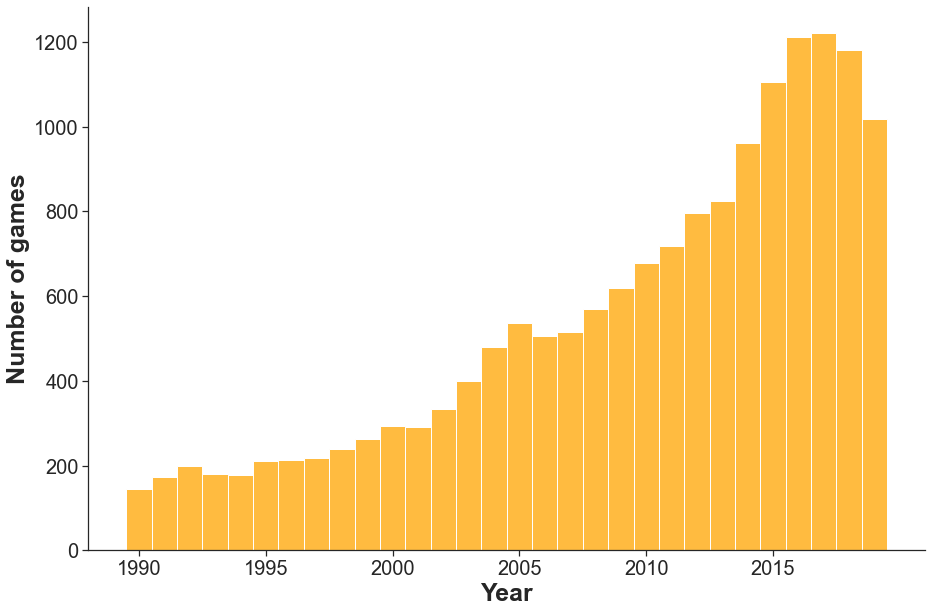

In [61]:
plot_published_games_over_years(games, 1990, 2019, False)

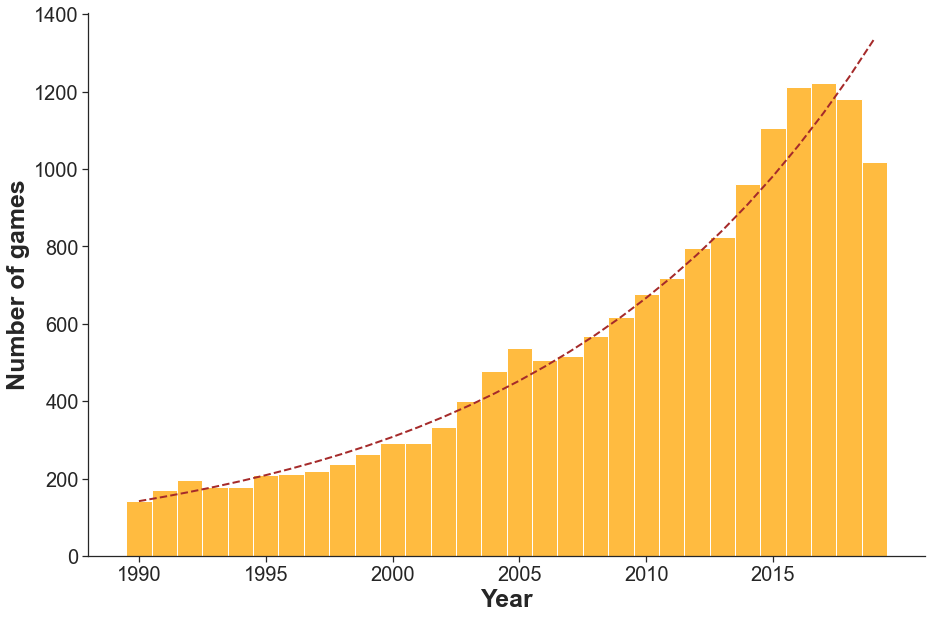

In [62]:
plot_published_games_over_years(games, 1990, 2019, True)

### 2. Average values of game attributes over years

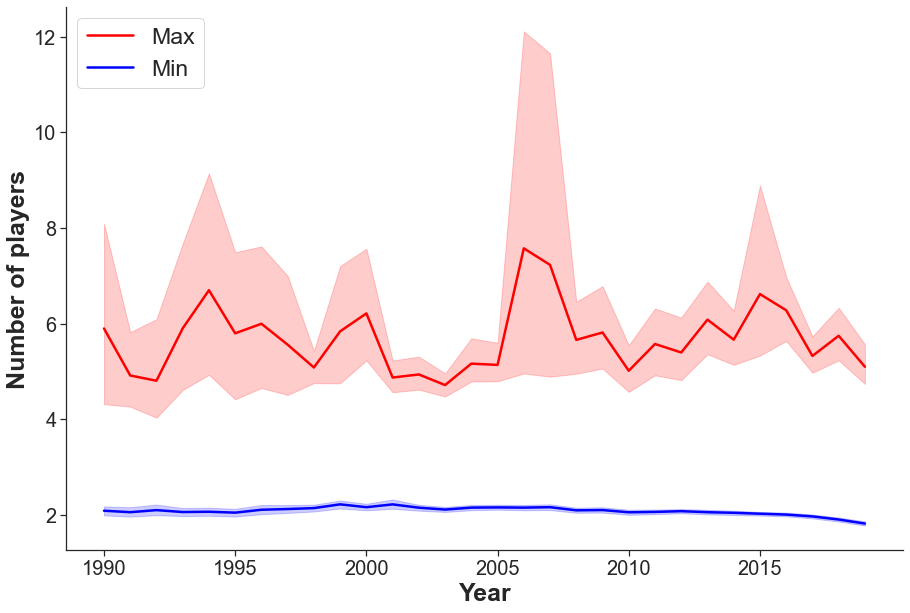

In [67]:
plot_min_max_attributes_over_years(games, lb, ub, "minplayers", "maxplayers", "Number of players")

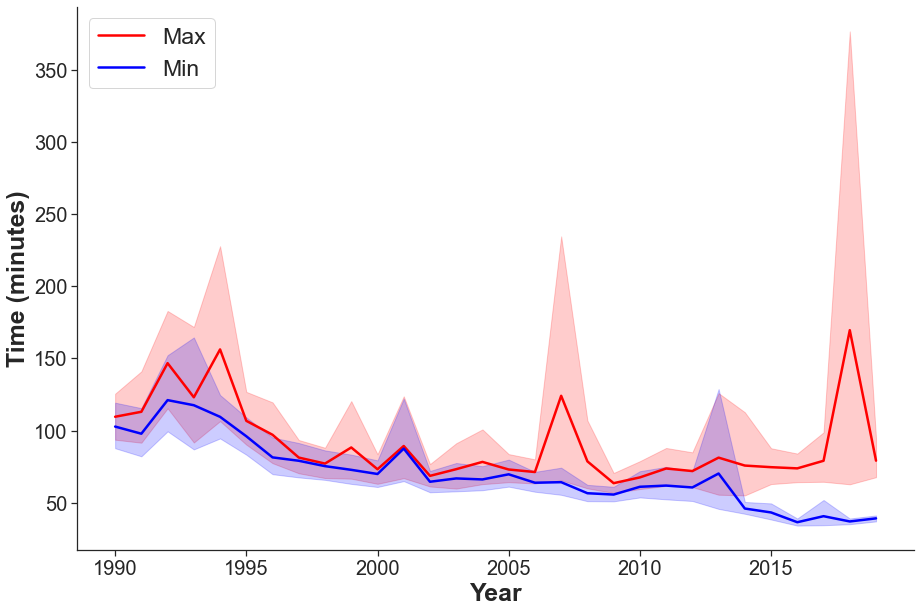

In [68]:
plot_min_max_attributes_over_years(games, lb, ub, "minplaytime", "maxplaytime", "Time (minutes)")

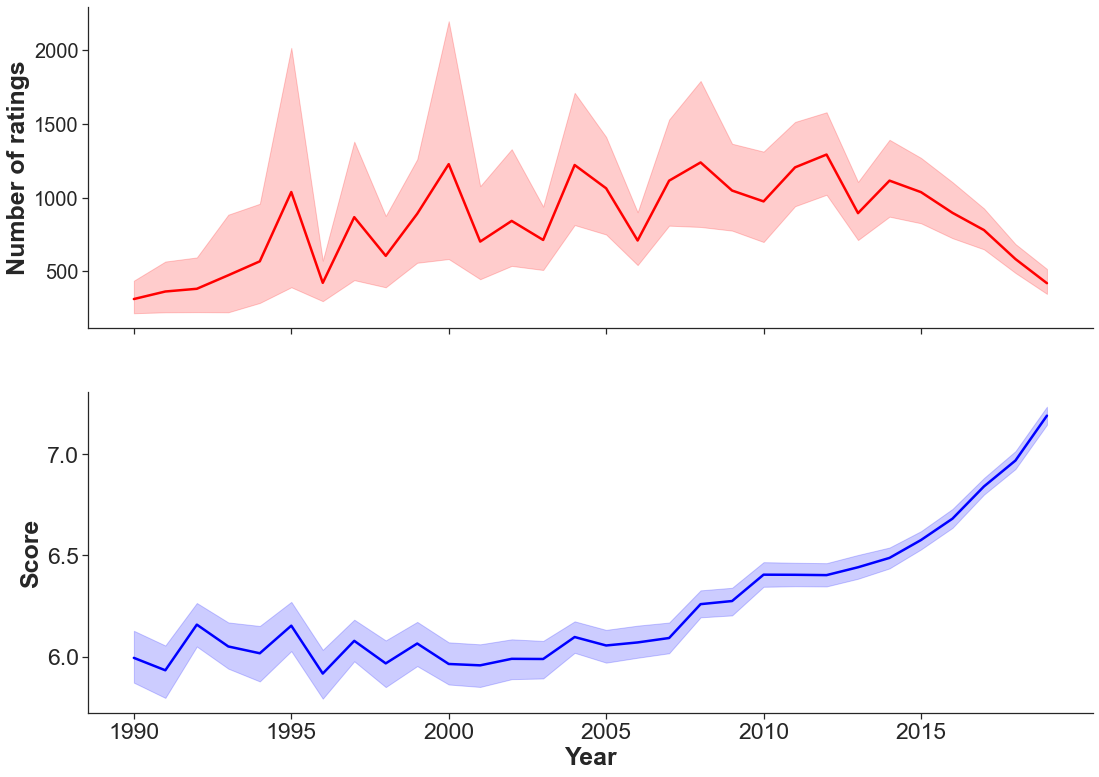

In [79]:
plot_ratings_over_years(games, 1990, 2019)

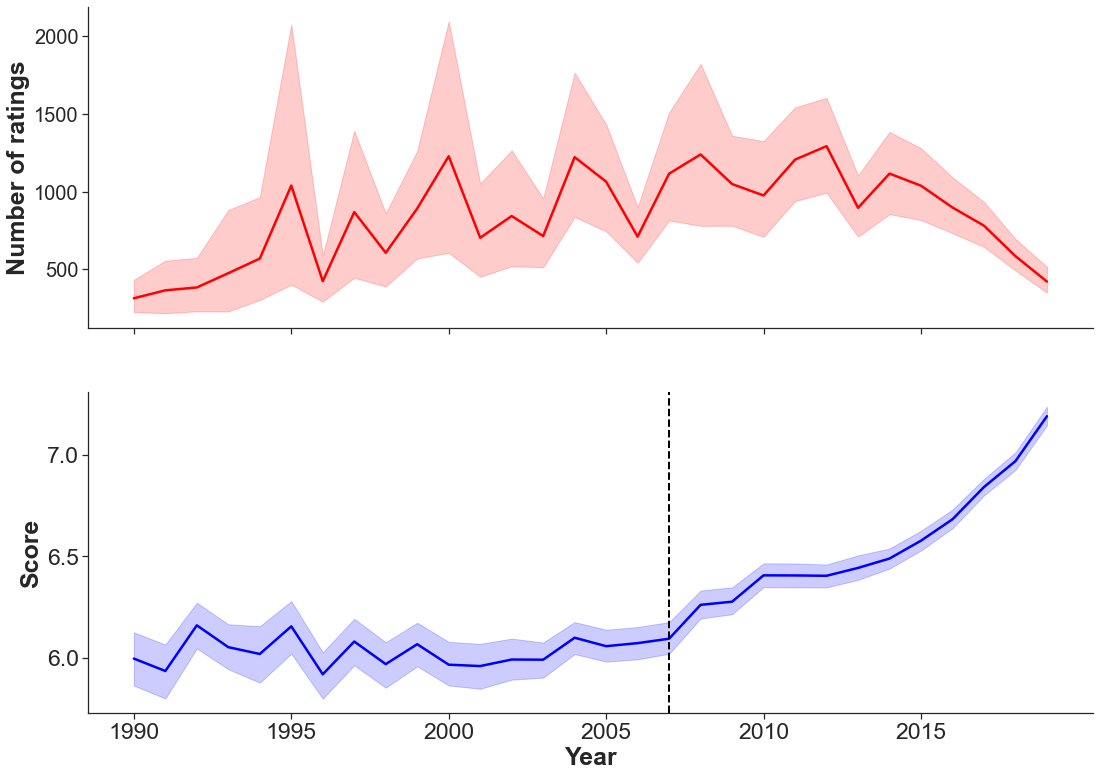

In [80]:
plot_ratings_over_years(games, 1990, 2019, 2007)

In [151]:
ds1 = games.loc[games["yearpublished"] <= 2007, "description"]
ds2 = games.loc[games["yearpublished"] > 2007, "description"]

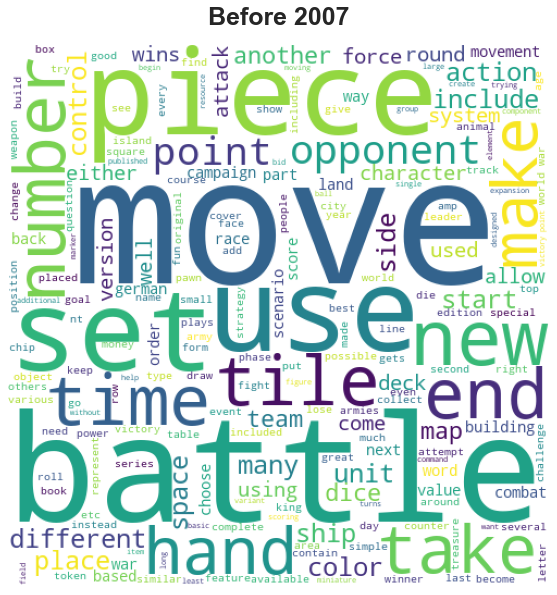

In [156]:
generate_word_cloud(ds1, title="Before 2007")

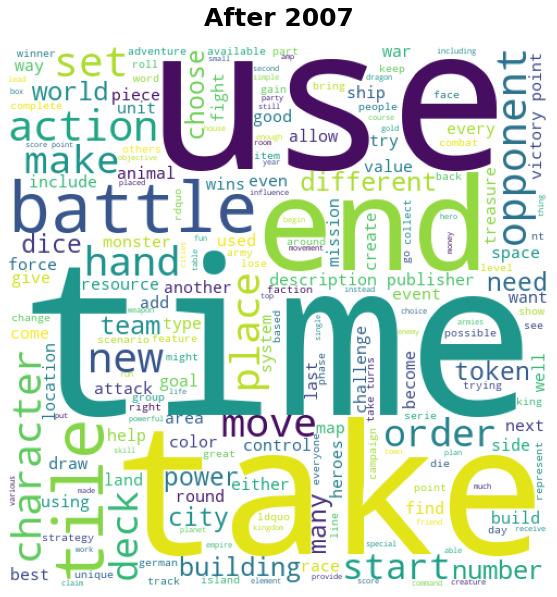

In [387]:
generate_word_cloud(ds2, title="After 2007")

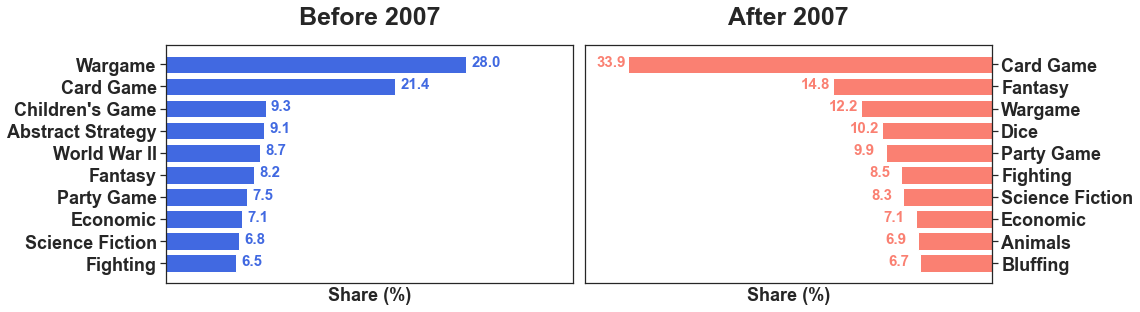

In [141]:
df1, df2, cat_cnts1, cat_cnts2, cat_inters = compare_top_ten_items(games, "category")

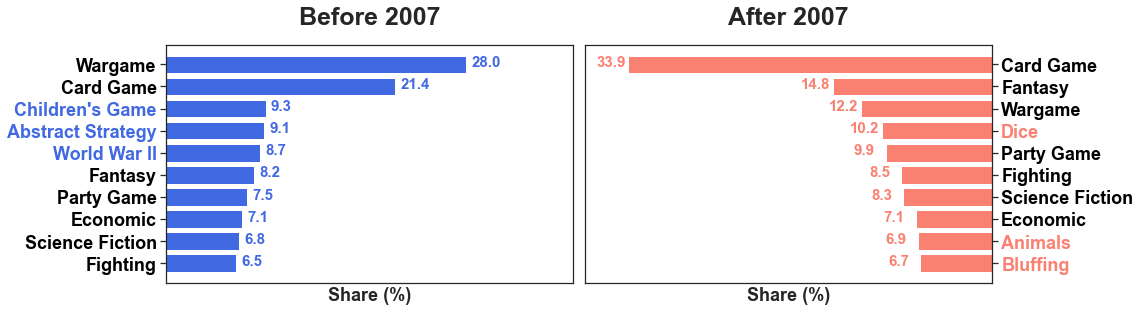

In [143]:
df1, df2, cat_cnts1, cat_cnts2, cat_inters = compare_top_ten_items(games, "category", True)

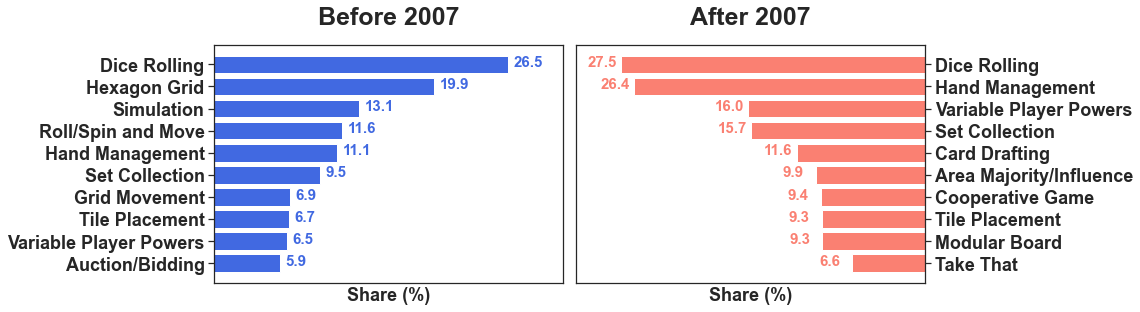

In [145]:
df1, df2, mec_cnts1, mec_cnts2, mec_inters = compare_top_ten_items(games, "mechanic")

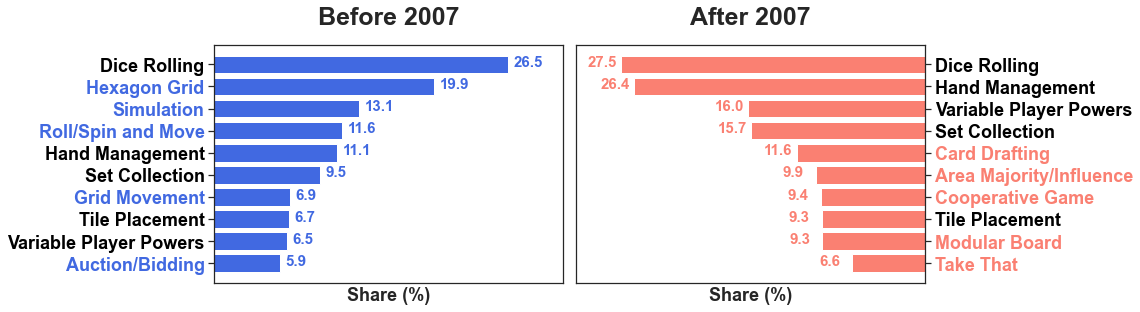

In [144]:
df1, df2, mec_cnts1, mec_cnts2, mec_inters = compare_top_ten_items(games, "mechanic", True)

In [ ]:
## To clean up

In [158]:
inters = cat_inters
population_size1 = df1.shape[0]
population_size2 = df2.shape[0]

In [ ]:
plt.figure(figsize=(10,5))
d1 = [100*item_cnts1[k]/population_size1 for k in inters]
d2 = [100*item_cnts2[k]/population_size2 for k in inters]
plt.scatter(d1, list(inters), c="royalblue", s=110, label="Before 2007")#, alpha=0.7)
plt.scatter(d2, list(inters), c="salmon", s=110, label="After 2007")#, alpha=0.7)
plt.scatter(d1[0], "Economic", c="purple", s=110)

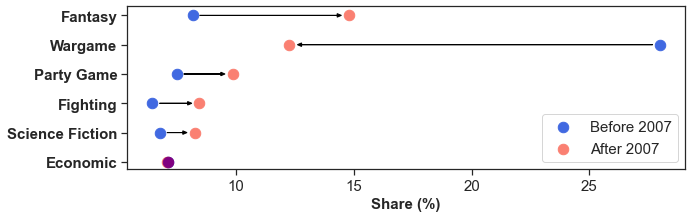

In [761]:
#inters = ["Fantasy", "Wargame", "Party Game", "Fighting", "Science Fiction", "Economic"]
inters = [  'Economic', 'Science Fiction', 'Fighting', 'Party Game', 'Wargame', 'Fantasy']
plt.figure(figsize=(10,3))
d1 = [100*item_cnts1[k]/df1.shape[0] for k in inters]
d2 = [100*item_cnts2[k]/df2.shape[0] for k in inters]
plt.scatter(d1, list(inters), c="royalblue", s=110, label="Before 2007")#, alpha=0.7)
plt.scatter(d2, list(inters), c="salmon", s=110, label="After 2007")#, alpha=0.7)
plt.scatter(d1[0], "Economic", c="purple", s=110)
#plt.scatter(d2, list(inters), c="salmon", s=110, label="After 2007")#, alpha=0.7)
plt.xlabel("Share (%)", fontsize=15, weight="bold")
plt.xticks(fontsize=15) #, weight="bold")
plt.yticks(fontsize=15, weight="bold")
for i in np.arange(len(inters)):
    if abs(d2[i]-d1[i]) > 0.5:
        if i != len(inters)-2:
            plt.arrow(d1[i]+0.3, i, (d2[i]-d1[i])-0.8, 0, head_starts_at_zero=False, head_width=0.12,width=0.0015, color="black" )#, color="purple")
i = len(inters)-2
plt.arrow(d1[i]-0.3, i, (d2[i]-d1[i])+0.85, 0, head_starts_at_zero=False, head_width=0.12,width=0.0015, color="black" )#, color="purple")
plt.legend(loc="lower right", fontsize=15)


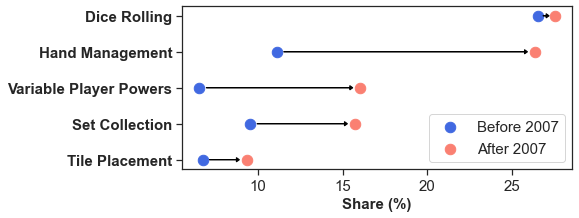

In [763]:
inters = [x[0] for x in mechanic_cnts2.most_common(10) if x[0] in [y[0] for y in mechanic_cnts1.most_common(10)]]
inters = [   'Tile Placement','Set Collection',"Variable Player Powers", "Hand Management", 'Dice Rolling']

plt.figure(figsize=(7,3))
d1 = [100*mechanic_cnts1[k]/df1.shape[0] for k in inters]
d2 = [100*mechanic_cnts2[k]/df2.shape[0] for k in inters]
plt.scatter(d1, list(inters), c="royalblue", s=110, label="Before 2007")
plt.scatter(d2, list(inters), c="salmon", s=110, label="After 2007")
plt.xlabel("Share (%)", fontsize=15, weight="bold")
plt.xticks(fontsize=15) #, weight="bold")
plt.yticks(fontsize=15, weight="bold")
for i in np.arange(len(inters)-1):
    plt.arrow(d1[i]+0.4, i, (d2[i]-d1[i])-1, 0, head_starts_at_zero=False, head_width=0.12,width=0.0015, color="black" )#, color="purple")
i = len(inters)-1
plt.arrow(d1[i]+0.3, i, (d2[i]-d1[i])-0.8, 0, head_starts_at_zero=False, head_width=0.12,width=0.0015, color="black" )#, color="purple")
plt.legend(loc="lower right", fontsize=15)
#plt.legend(fontsize=15)